# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1
For every column in the data:
1.  State whether the values match the description given in the table above.
2.  State the number of missing values in the column.
3.  Describe what you did to make values match the description if they did not match.

In [30]:
import pandas as pd
df = pd.read_csv('pet_supplies_2212.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [31]:
for i in df:
    print(f'{i}:',df[i].unique(), '\n')
#print unique value in each column

product_id: [   1    2    3 ... 1498 1499 1500] 

category: ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-'] 

animal: ['Bird' 'Dog' 'Cat' 'Fish'] 

size: ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE'] 

price: ['51.1' '35.98' '31.23' '24.95' '26.18' '30.77' '31.04' '28.9' '17.82'
 '24.93' '40.87' '34.96' '31.07' '40.8' '33.13' '43.09' '28.29' '43.91'
 '33.87' '44' 'unlisted' '41' '32.98' '22.99' '38.99' '45.83' '28.24'
 '28.19' '27.79' '38.86' '22.89' '26.07' '28.02' '23.99' '28.25' '30.87'
 '28.09' '29.01' '26.13' '54.03' '31.2' '30.92' '20.95' '17.98' '27.7'
 '24.8' '31.09' '19.83' '33.15' '21.25' '38.06' '30.89' '35.04' '26.03'
 '33.94' '25.81' '32.99' '17.9' '30.96' '40.93' '24.98' '26.08' '23.08'
 '26' '22.95' '39.03' '23.19' '31' '21.05' '31.5' '24.7' '27.76' '18.06'
 '28.43' '43.99' '41.03' '28.28' '25.96' '27.86' '38.95' '36.22' '23.02'
 '21.14' '42.99' '27.95' '38' '28.2' '39.16' '25.07' '15' '35.95' '30.03'
 '22.98' '27.97' '28.

In [32]:
df.info() #check if any missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [33]:
# Cleaning

df['category'] = df['category'].replace('-','Unknown') #replace '-' to 'Unknown'

df['size'] = df['size'].str.title() #unify one format

df['price'] = df['price'].replace('unlisted','') #remove character
df['price'] = pd.to_numeric(df['price'],downcast='float') #convert to float
df['price'] = round(df['price'].fillna(df['price'].median()),2) #fill with median and round to 2 decimal places

df['sales'] = round(df['sales'],2) #round to 2 decimal places

df['rating'] = df['rating'].fillna(0) #filling missing value
df['rating'] = pd.to_numeric(df['rating'],downcast='integer') #convert to integer




In [34]:
for i in df:
    print('There are',df[i].nunique(),f'unique values in {i} column','\n')

There are 1500 unique values in product_id column 

There are 7 unique values in category column 

There are 4 unique values in animal column 

There are 3 unique values in size column 

There are 706 unique values in price column 

There are 1476 unique values in sales column 

There are 10 unique values in rating column 

There are 2 unique values in repeat_purchase column 



1. **Product_id:** There were 1500 unique values that match the description given. There are no missing values. No changes were made to this column.
2. **Category:** There were 7 unique values. 6 values were matched to description given, the remaining mismatch was changed to 'unknown'.
3. **Animal** There were 4 unique values. No missing value. No changing was made in this column
4. **Size** There were 3 unique values that matched to the description given but they were not in the same the format so there was a change in their format. No missing value in column.
5. **Price:** Values of this column was consistent with the description given, but there was 'unlisted' value which was unmatched so changed it to median of all over the value. No missing value. Round to 2 decimal places
6. **Sales** There were 1476 unique values that matched to the description given.No missing value. Round to 2 decimal places.
7. **Rating** 150 missing values in the column. All missing values were replaced to 0. 
8. **Repeat_purchase** 2 unique values which match to description given. No missing value and no change was made.


## Task 2
Create a visualization that shows how many products are repeat purchases. Use the
visualization to:
1. State which category of the variable repeat purchases has the most observations
2. Explain whether the observations are balanced across categories of the variable repeat purchases


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.099998,1860.62,7,1
1,2,Housing,Bird,Medium,35.980000,963.60,6,0
2,3,Food,Dog,Medium,31.230000,898.30,5,1
3,4,Medicine,Cat,Small,24.950001,982.15,6,1
4,5,Housing,Cat,Small,26.180000,832.63,7,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,Medium,40.910000,1203.36,5,0
1496,1497,Equipment,Dog,Small,32.889999,1099.97,5,0
1497,1498,Food,Fish,Small,25.790001,724.02,3,0
1498,1499,Medicine,Fish,Small,19.940001,658.66,5,1


### There are 6 possible categories in this data. The most repeat purchase is Equipment worth 220. data is quite balanced because three of them those are Food, Housing and Medicine, are equal. Toys are a little less but not significant. Accessories have the least number of redemptions, possibly because the accessory is not a pet essential. They should care more about the item being bought back.

## Task 3

Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

(array([  4.,   4.,  29.,   2.,  26.,  22.,  35.,  17.,  24.,  78.,  66.,
         78.,  56.,  72.,  66.,  50.,  10., 104., 149., 124.,  70.,  36.,
         19.,  49.,   0.,  10.,  47.,  41.,  77.,  51.,  17.,  10.,   9.,
          0.,   0.,   0.,   5.,   0.,  10.,  17.,   9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   7.]),
 array([ 286.94  ,  326.3204,  365.7008,  405.0812,  444.4616,  483.842 ,
         523.2224,  562.6028,  601.9832,  641.3636,  680.744 ,  720.1244,
         759.5048,  798.8852,  838.2656,  877.646 ,  917.0264,  956.4068,
         995.7872, 1035.1676, 1074.548 , 1113.9284, 1153.3088, 1192.6892,
        1232.0696, 1271.45  , 1310.8304, 1350.2108, 1389.5912, 1428.9716,
        1468.352 , 1507.7324, 1547.1128, 1586.4932, 1625.8736, 1665.254 ,
        1704.6344, 1744.0148, 1783.3952, 1822.7756, 1862.156 , 1901.5364,
        1940.9168, 1980.2972, 2019.6776, 2059.058 , 2098.4384, 2137.8188,
        2177.1992, 2216.5796, 2255.96  ]),
 <BarContainer object o

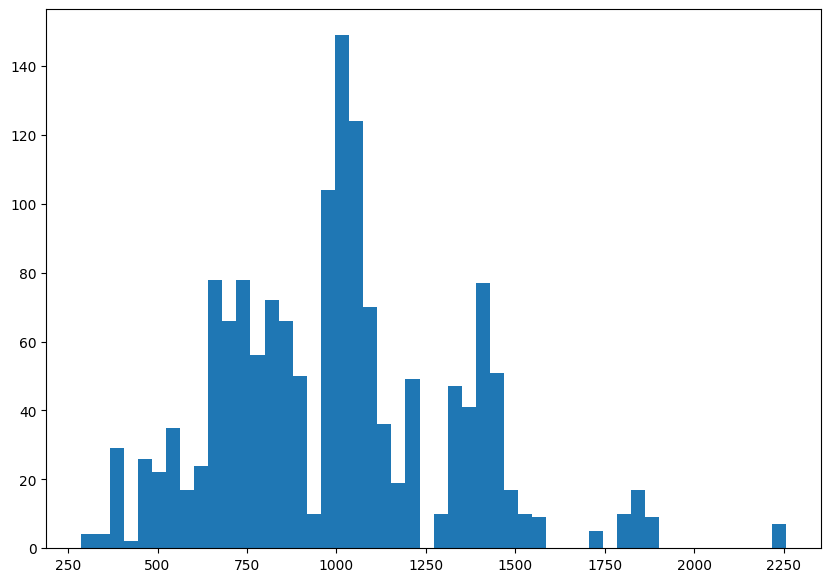

In [37]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['sales'], bins= 50)

### Tracking sales allocation is a necessity to improve sales quality as well as sales, to know what to focus on.

### Looking at sales, the value ranges from over 250 to a little more than 2250, but the main value is concentrated from about 500 to nearly 1500 and at most around 1000, some outliers value from 1750 to 2250  .The distribution of the data is slightly to the right.

### it seems that customers are willing to spend on their pet items with a fairly high spending level, they can focus on the quality of the product to increase their sales

## Task 4 

Describe the relationship between repeat purchases and sales. Your answer must
include a visualization to demonstrate the relationship.

### As you can see the scatter chart bellow, there is a positive relation between sales and repeat purchase eventhough non-repeat purchase, customer repurchase leads to increased sales. It seems that people really like the quality of PetMind products as the higher the price of the item, the customers still decide to make a purchase.

### Beyond this, there is also a grouping of sales on price $28.07 which represents the median value that was imputed over missing values

![image](image.png)


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam